# **Segmentez des clients d'un site e-commerce**

# **Contexte**
Olist souhaite qu'on fournit à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
L'objectif de ce notebook est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

# **Plan du notebook**
1. Import des données
2. Méthode du RFM et feature Engineering
3. Algorithme du CAH
4. Kmeans (combinaison de variable n1)
5. Kmeans (combinaison de variable n2)
6. Conclusion

### **1. Import des données**

In [354]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [483]:
df6 = pd.read_csv('df6.csv')

# **2.Modèle RFM et feature engineering**

In [484]:
df6['recency'] = df6.groupby('customer_unique_id')['order_delivered_customer_date'].transform('last')

In [485]:
df6 = df6.drop(df6[df6.order_id.duplicated()== True].index)

In [486]:
df6['recency'].describe()

count                   96469
unique                  92590
top       2018-08-24 17:26:42
freq                       15
Name: recency, dtype: object

In [487]:
df6['recency'] = pd.to_datetime(df6['recency'])

In [488]:
df6['order_delivered_customer_date'] = pd.to_datetime(df6['order_delivered_customer_date'])

In [489]:
df6.drop(columns=['order_purchase_timestamp','order_approved_at','order_estimated_delivery_date','order_delivered_carrier_date'],inplace=True)

In [137]:
from datetime import datetime

reference_date = datetime(2018,10,18,0,0,0,0)
(reference_date -df6['recency']).dt.days

KeyError: 'recency'

In [10]:
import datetime
start_date_s1 = datetime.datetime(2018,4,1)
end_date_s1   = datetime.datetime(2018,10,18)

start_date_s2 = datetime.datetime(2017,10,1)
end_date_s2   = datetime.datetime(2018,3,31)

#df8 =df6[df6.order_delivered_customer_date.isin(date_list)]
df6_s1 = df6[df6.order_delivered_customer_date >= start_date_s1]
df6_s2 = df6[(df6.order_delivered_customer_date >=start_date_s2) & (df6.order_delivered_customer_date <=end_date_s2)]

In [11]:
# Grouping by CustomerID
data_process_s1 = df6_s1.groupby(['customer_unique_id']).agg({
        'recency': lambda x: (reference_date -x).dt.days,
        'order_id': 'count',
        'price': 'sum'})

data_process_s2 = df6_s2.groupby(['customer_unique_id']).agg({
        'recency': lambda x: (reference_date -x).dt.days,
        'order_id': 'count',
        'price': 'sum'})

In [12]:
data_process_s1.recency =pd.to_numeric(data_process_s1.recency, errors ='coerce').fillna(0).astype('int')
data_process_s2.recency =pd.to_numeric(data_process_s2.recency, errors ='coerce').fillna(0).astype('int')

In [13]:
data_process_s1 = data_process_s1.rename(columns={'order_id':'total numbers of orders','price':'sum of expenses'})
data_process_s1.sort_values(by='recency',ascending = True)

,recency,total numbers of orders,sum of expenses
customer_unique_id,,,
b8beb7a6bfb7ed884386a8da46be8f8e,0,2,282.99
14843983d4a159080f6afe4b7f346e7c,0,2,47.60
44dbd08cc06662e0ca8ac504aac75f18,0,2,259.80
a253d10c681ebc4ee987907d2fd156ce,0,2,387.90
7580e539c3d74ce5ff3946877db01dd2,0,2,60.00
...,...,...,...
3af90f255e824d1d53b3584a4e89ad58,614,1,105.00
acf91aaa6f337456d3c506a5a494552c,616,1,89.90
18bc87094128bbfe943cf88adcf72059,623,1,29.89


In [14]:
data_process_s2 = data_process_s2.rename(columns={'order_id':'total numbers of orders','price':'sum of expenses'})
data_process_s2.sort_values(by='recency',ascending = True)

,recency,total numbers of orders,sum of expenses
customer_unique_id,,,
dd25b514ee922669e5de2d638199a3e3,0,2,162.80
3991c84b618da2e02b44ba48aba925d1,0,2,49.94
44bd7571a7dad968306f7776bd5a5745,0,2,146.80
9eb77967122094a4eea4084933b47a1e,0,2,250.20
e5ec513f807eb586f0cb8ab492f59e13,0,2,65.99
...,...,...,...
5e0aa142dc4760e62a74c1830cbf91b1,624,1,49.90
69aab61687fa416ef601af332bd0ff0d,629,1,70.00
e30b83af13d6ff0b0f427b2a67c43b39,632,1,0.00


In [15]:
data_process_s1.sort_values(by='sum of expenses',ascending = False)

,recency,total numbers of orders,sum of expenses
customer_unique_id,,,
c8460e4251689ba205045f3ea17884a1,0,4,680.00
08e5b38d7948d37fbb2a59fc5e175ab1,0,3,546.89
d26c616e241736e0c1c1ab14150239e7,0,3,515.90
821e75291b1ad362e614c0ea79fc95a6,0,3,480.00
879ee1f90476a2fad74aec4f9c9961b3,0,2,464.91
...,...,...,...
8b8c6cd9b82fe4f684b16e22940d7709,198,1,0.00
8b4870d5e710991db0eb07f29084b00f,72,1,0.00
e3dbb640e974b2bf603d16d3a7c72306,186,1,0.00


In [16]:
df6_s1 = df6_s1.drop(columns=['recency'],axis=1)
df6_s2 = df6_s2.drop(columns=['recency'],axis=1)

In [17]:
#rfm_table = pd.merge(df6, data_process, on='customer_unique_id')
rfm_table_s1 = data_process_s1
rfm_table_s2 = data_process_s2

In [18]:
rfm_table_s1 = rfm_table_s1.rename(columns={'total numbers of orders':'Frequency','sum of expenses':'Monetary','recency':'Recency'})
rfm_table_s2 = rfm_table_s2.rename(columns={'total numbers of orders':'Frequency','sum of expenses':'Monetary','recency':'Recency'})

On choisit k =2

C:\Users\ROUA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ROUA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ROUA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

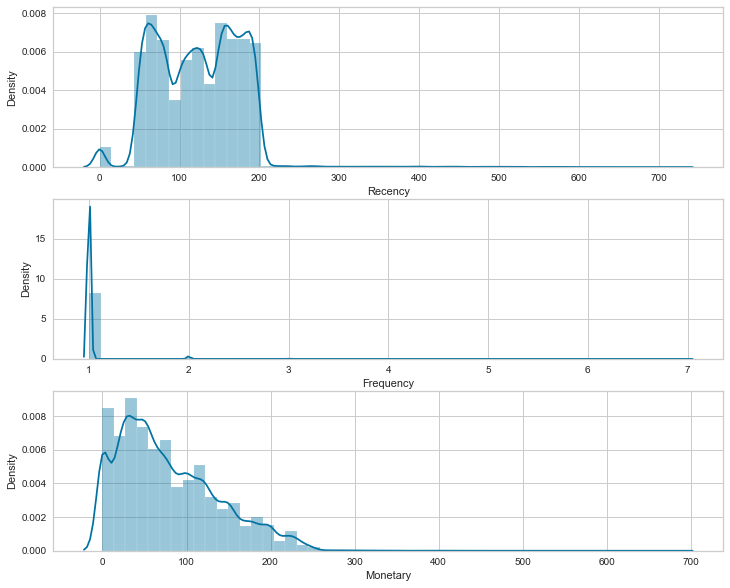

In [19]:
import datetime as dt
from datetime import datetime
import matplotlib.ticker as mticker
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_table_s1['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_table_s1['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_table_s1['Monetary'])
# Show the plot
plt.show()

In [20]:
#### Function for ordering clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
  
#Recency Clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(rfm_table_s1[['Recency']])
rfm_table_s1['RecencyCluster']=kmeans.predict(rfm_table_s1[['Recency']])
rfm_table_s1 = order_cluster('RecencyCluster','Recency', rfm_table_s1, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(rfm_table_s1[['Frequency']])
rfm_table_s1['FrequencyCluster']=kmeans.predict(rfm_table_s1[['Frequency']])
rfm_table_s1 = order_cluster('FrequencyCluster','Frequency', rfm_table_s1, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(rfm_table_s1[['Monetary']])
rfm_table_s1['MonetaryCluster']=kmeans.predict(rfm_table_s1[['Monetary']])
rfm_table_s1 = order_cluster('MonetaryCluster','Monetary', rfm_table_s1, True)

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating Recency Custer Tag Column
c=rfm_table_s1.groupby('RecencyCluster')['Recency'].agg(['min','max','mean']).reset_index()
r1=str(c.iloc[0,1])+' to '+str(c.iloc[0,2]) 
r2='>'+str(c.iloc[0,2])
# Create the dictionary 
R ={1 : r1, 0 : r2} 
rfm_table_s1['RecencyClusterTag']=rfm_table_s1['RecencyCluster'].apply(set_value, args =(R, )) 

# Creating Frequency Cluster Tag Column
a=rfm_table_s1.groupby('FrequencyCluster')['Frequency'].agg(['min','max','mean']).reset_index()
f1=str(a.iloc[0,1])+' to '+str(a.iloc[0,2]) 
f2='>'+str(a.iloc[0,2])
# Create the dictionary 
F ={0 : f1, 1 : f2} 
rfm_table_s1['FrequencyClusterTag']=rfm_table_s1['FrequencyCluster'].apply(set_value, args =(F, )) 

# Creating Monetary Cluster Tag Column
b=rfm_table_s1.groupby('MonetaryCluster')['Monetary'].agg(['min','max','mean']).reset_index()
m1=str(a.iloc[0,1])+' to '+str(a.iloc[0,2]) 
m2='>'+str(a.iloc[0,2])
# Create the dictionary 
M ={0 : m1, 1 : m2} 
rfm_table_s1['MonetaryClusterTag']=rfm_table_s1['MonetaryCluster'].apply(set_value, args =(M, )) 

rfm_table_s1["FrequencyClusterTag"] = rfm_table_s1["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2]))
rfm_table_s1["MonetaryClusterTag"] = rfm_table_s1["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2]))
rfm_table_s1["RecencyClusterTag"] = rfm_table_s1["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2]))

In [21]:
rfm_table_s1.Frequency.value_counts()

1    34887
2      508
3       28
4        2
7        1
Name: Frequency, dtype: int64

In [22]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['RecencyCluster']) + str(x['FrequencyCluster']) + str(x['MonetaryCluster'])
rfm_table_s1['RFM_Segment_Concat'] = rfm_table_s1.apply(join_rfm, axis=1)
rfm_table_s1

,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,RFM_Segment_Concat
0,154,1,129.90,0,0,1,>723,1 to 1,>1,001
1,193,1,154.00,0,0,1,>723,1 to 1,>1,001
2,165,1,104.90,0,0,1,>723,1 to 1,>1,001
3,152,1,159.99,0,0,1,>723,1 to 1,>1,001
4,174,1,199.90,0,0,1,>723,1 to 1,>1,001
...,...,...,...,...,...,...,...,...,...,...
35421,0,2,43.29,1,1,0,123 to 723,>1,1 to 1,110
35422,0,2,62.78,1,1,0,123 to 723,>1,1 to 1,110
35423,0,2,67.89,1,1,0,123 to 723,>1,1 to 1,110
35424,0,2,0.00,1,1,0,123 to 723,>1,1 to 1,110


#best customers RFM score 111
Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

RFM Score: X1X
Who They Are: Customers who buy the most often from your store.

Your Highest Paying Customers
RFM Score: XX1
Who They Are: Customers who have generated the most revenue for your store.

RFM Score: 00X
Who They Are: Great past customers who haven't bought in a while.

Your Newest Customers
RFM Score: 10X
Who They Are: First time buyers on your site.

RFM Score: Remaining Scores
Who They Are: Customer who have average metrics across each RFM scores.

In [23]:
# Define rfm_level function RFM
def rfm_level(df):
    if df['RFM_Segment_Concat'] == '111':
        return 'Can\'t Loose Them'
    elif (df['RFM_Segment_Concat'][1]=='1'):
        return 'Loyal'
    elif (df['RFM_Segment_Concat'][2] == '1'):
        return 'Highest Paying Customers'
    elif ((df['RFM_Segment_Concat'][0] =='0') and (df['RFM_Segment_Concat'][1] =='0') and (df['RFM_Segment_Concat'][2] =='1')):
        return 'Great past customers'
    elif ((df['RFM_Segment_Concat'][0] =='1') and (df['RFM_Segment_Concat'][1] =='0')):
        return 'Newest Customers'

    else:
        return 'Require Attention'
# Create a new variable RFM_Level
rfm_table_s1['RFM_Level'] = rfm_table_s1.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_table_s1.head()

,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,RFM_Segment_Concat,RFM_Level
0,154,1,129.90,0,0,1,>723,1 to 1,>1,001,Highest Paying Customers
1,193,1,154.00,0,0,1,>723,1 to 1,>1,001,Highest Paying Customers
2,165,1,104.90,0,0,1,>723,1 to 1,>1,001,Highest Paying Customers
3,152,1,159.99,0,0,1,>723,1 to 1,>1,001,Highest Paying Customers
4,174,1,199.90,0,0,1,>723,1 to 1,>1,001,Highest Paying Customers


In [24]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_table_s1.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                         Recency Frequency Monetary       
                            mean      mean     mean  count
RFM_Level                                                 
Can't Loose Them             0.0       2.1    198.3    363
Highest Paying Customers   125.8       1.0    144.0  12123
Loyal                        0.0       2.0     51.8    176
Newest Customers            81.6       1.0     41.1  11025
Require Attention          166.6       1.0     41.0  11739


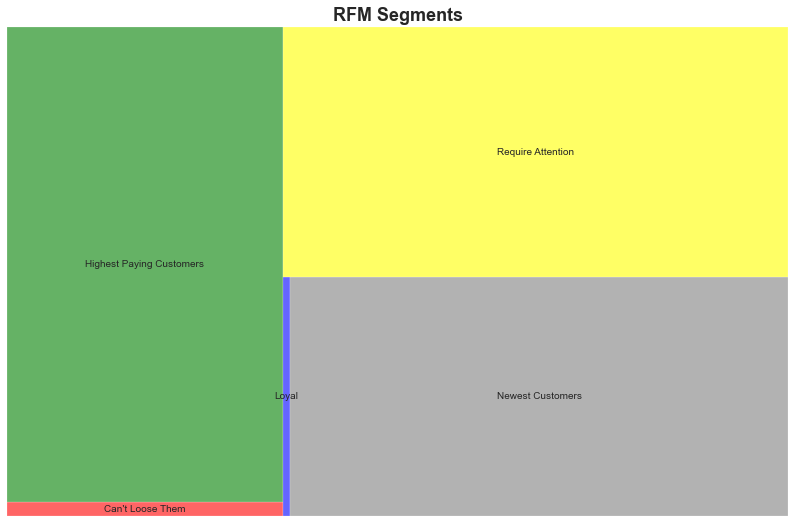

In [25]:
#Create our RFM Segment plot and resize it.
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Highest Paying Customers',
                     'Loyal',
                     'Newest Customers',
                     'Require Attention', 
                     'Great past customers'],color=["red","green","blue", "grey","yellow"], alpha=0.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## **3.Modèle CAH**

In [26]:
df7_s1 = pd.merge(df6_s1, data_process_s1, on='customer_unique_id')
df7_s2 = pd.merge(df6_s2, data_process_s2, on='customer_unique_id')

In [27]:
df7_s1 = df7_s1.drop(df7_s1[df7_s1['sum of expenses'] ==0].index)
df7_s2 = df7_s2.drop(df7_s2[df7_s2['sum of expenses'] ==0].index)

In [28]:
df7_s1.shape

(32626, 65)

In [29]:
df7_s2.shape

(32334, 65)

In [30]:
df7_s1.columns

Index(['Unnamed: 0', 'order_id', 'customer_unique_id',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_score', 'customer_id', 'customer_zip_code_prefix',
       'customer_city', 'seller_zip_code_prefix', 'seller_city',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_installments', 'payment_value', 'order_status_approved',
       'order_status_canceled', 'order_status_delivered',
       'order_status_invoiced', 'order_status_processing',
       'order_status_shipped', 'order_status_unavailable',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'paym

In [31]:
df7_s1 = df7_s1.groupby(['customer_unique_id']).sum()
df7_s2 = df7_s2.groupby(['customer_unique_id']).sum()

In [32]:
df7_s1.describe()

,Unnamed: 0,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,...,customer_state_south,customer_state_south east,seller_state_center east,seller_state_north,seller_state_north east,seller_state_south,seller_state_south east,recency,total numbers of orders,sum of expenses
count,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,...,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000
mean,66387.910205,1.035357,86.073641,19.965283,4.228650,34334.930003,23643.321766,49.598042,801.052723,2.232688,...,0.138029,0.716491,0.014155,0.000031,0.022667,0.119665,0.860724,123.358682,1.054719,88.913345
std,39644.519479,0.213207,56.981772,13.954954,1.460579,30642.857175,27280.430767,12.850744,646.532302,1.768538,...,0.351561,0.479924,0.118659,0.005584,0.151129,0.327062,0.386091,53.593347,0.522891,71.322406
min,109.000000,1.000000,0.850000,0.000000,1.000000,1003.000000,1001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000
25%,30798.000000,1.000000,39.900000,12.920000,4.000000,9751.000000,5849.000000,43.000000,364.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,78.000000,1.000000,39.990000
50%,67519.000000,1.000000,70.000000,18.090000,5.000000,23052.000000,13419.000000,52.000000,629.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,124.000000,1.000000,72.000000
75%,99848.000000,1.000000,119.990000,22.480000,5.000000,55650.000000,25070.000000,57.000000,1004.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,166.000000,1.000000,120.000000
max,471547.000000,7.000000,680.000000,299.160000,35.000000,364680.000000,243865.000000,328.000000,9383.000000,20.000000,...,4.000000,7.000000,2.000000,1.000000,4.000000,3.000000,5.000000,723.000000,49.000000,2720.000000


In [33]:
df7_s1 = df7_s1.select_dtypes(exclude=['object','datetime64[ns]'])
df7_s2 = df7_s2.select_dtypes(exclude=['object','datetime64[ns]'])

In [34]:
df7_s1.shape

(32073, 52)

In [35]:
df7_s1 = df7_s1.fillna(df7_s1.mean())
df7_s2 = df7_s2.fillna(df7_s2.mean())

In [36]:
df7_s1.shape

(32073, 52)

In [37]:
'''%%time
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(df7_s1.values,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=df7_s1.index,orientation='left',color_threshold=0)
plt.show()'''

'%%time\n#librairies pour la CAH\nfrom matplotlib import pyplot as plt\nfrom scipy.cluster.hierarchy import dendrogram, linkage\n#générer la matrice des liens\nZ = linkage(df7_s1.values,method=\'ward\',metric=\'euclidean\')\n#affichage du dendrogramme\nplt.title("CAH")\ndendrogram(Z,labels=df7_s1.index,orientation=\'left\',color_threshold=0)\nplt.show()'

In [38]:
'''%%time
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = df7_s1.values
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None).fit(X)
clustering.labels_'''

"%%time\nfrom sklearn.cluster import AgglomerativeClustering\nimport numpy as np\nX = df7_s1.values\nclustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None).fit(X)\nclustering.labels_"

In [39]:
'''from sklearn.metrics import davies_bouldin_score 
score_db = davies_bouldin_score(X,clustering.labels_)
score_db'''

'from sklearn.metrics import davies_bouldin_score \nscore_db = davies_bouldin_score(X,clustering.labels_)\nscore_db'

In [40]:
'''from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_cah= silhouette_score(X, clustering.labels_)
silhouette_cah'''

'from sklearn.metrics import silhouette_samples, silhouette_score\nsilhouette_cah= silhouette_score(X, clustering.labels_)\nsilhouette_cah'

In [41]:
'''%%time
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = df7_s1.values
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None).fit(X)
clustering.labels_'''

"%%time\nfrom sklearn.cluster import AgglomerativeClustering\nimport numpy as np\nX = df7_s1.values\nclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None).fit(X)\nclustering.labels_"

In [42]:
'''score_db = davies_bouldin_score(X,clustering.labels_)
score_db'''

'score_db = davies_bouldin_score(X,clustering.labels_)\nscore_db'

In [43]:
'''from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_cah= silhouette_score(X, clustering.labels_)
silhouette_cah'''

'from sklearn.metrics import silhouette_samples, silhouette_score\nsilhouette_cah= silhouette_score(X, clustering.labels_)\nsilhouette_cah'

### **4. Kmeans (combinaison de variables 1)**

In [44]:
'''conditions = [
    (df7_s1['sum of expenses'] > df7_s1['sum of expenses'].mean()),
    (df7_s1['sum of expenses'] <= df7_s1['sum of expenses'].mean())]
choices = [1 ,0 ]
df7_s1['sum of expenses'] =np.select(conditions, choices,default=1)'''

"conditions = [\n    (df7_s1['sum of expenses'] > df7_s1['sum of expenses'].mean()),\n    (df7_s1['sum of expenses'] <= df7_s1['sum of expenses'].mean())]\nchoices = [1 ,0 ]\ndf7_s1['sum of expenses'] =np.select(conditions, choices,default=1)"

In [45]:
'''conditions = [
    (df7_s1['review_score'] >3),
    (df7_s1['review_score'] == 2) & (df7_s1['review_score'] == 3),
    (df7_s1['review_score'] <= 1)]
choices = [2,1 ,0 ]
df7_s1['review_score'] =np.select(conditions, choices,default=1)'''

"conditions = [\n    (df7_s1['review_score'] >3),\n    (df7_s1['review_score'] == 2) & (df7_s1['review_score'] == 3),\n    (df7_s1['review_score'] <= 1)]\nchoices = [2,1 ,0 ]\ndf7_s1['review_score'] =np.select(conditions, choices,default=1)"

In [46]:
df7_s1.review_score

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0004bd2a26a76fe21f786e4fbd80607f    4.0
00050ab1314c0e55a6ca13cf7181fecf    4.0
0005ef4cd20d2893f0d9fbd94d3c0d97    1.0
                                   ... 
fff2ae16b99c6f3c785f0e052f2a9cfb    5.0
fff3e1d7bc75f11dc7670619b2e61840    5.0
fff5eb4918b2bf4b2da476788d42051c    5.0
fff96bc586f78b1f070da28c4977e810    4.0
ffff5962728ec6157033ef9805bacc48    5.0
Name: review_score, Length: 32073, dtype: float64

In [47]:
conditions = [
    (df7_s1['customer_state_north'] ==1),
    (df7_s1['customer_state_north east'] == 1),
    (df7_s1['customer_state_center east'] == 1),
    (df7_s1['customer_state_south east'] == 1),
    (df7_s1['customer_state_south'] == 1)]
choices = [1,2,3,4,5]
df7_s1['customer_state'] = np.select(conditions, choices)

In [48]:
conditions = [
    (df7_s2['customer_state_north'] ==1),
    (df7_s2['customer_state_north east'] == 1),
    (df7_s2['customer_state_center east'] == 1),
    (df7_s2['customer_state_south east'] == 1),
    (df7_s2['customer_state_south'] == 1)]
choices = [1,2,3,4,5]
df7_s2['customer_state'] = np.select(conditions, choices)

In [49]:
conditions = [
    (df7_s1['payment_type_credit_card'] ==1),
    (df7_s1['payment_type_boleto'] == 1),
    (df7_s1['payment_type_debit_card'] == 1),
    (df7_s1['payment_type_voucher'] == 1)]
choices = [1,2,3,4]
df7_s1['payment_type'] = np.select(conditions, choices)

In [50]:
conditions = [
    (df7_s2['payment_type_credit_card'] ==1),
    (df7_s2['payment_type_boleto'] == 1),
    (df7_s2['payment_type_debit_card'] == 1),
    (df7_s2['payment_type_voucher'] == 1)]
choices = [1,2,3,4]
df7_s2['payment_type'] = np.select(conditions, choices)

In [51]:
'''conditions = [
    (df7_s1['recency'] <=90),
    ((df7_s1['recency'] > 90) & (df7_s1['recency']<=200)),
    (df7_s1['recency'] > 365),
    ]
choices = [3,2,1]
df7_s1['recency_score'] = np.select(conditions, choices)'''

"conditions = [\n    (df7_s1['recency'] <=90),\n    ((df7_s1['recency'] > 90) & (df7_s1['recency']<=200)),\n    (df7_s1['recency'] > 365),\n    ]\nchoices = [3,2,1]\ndf7_s1['recency_score'] = np.select(conditions, choices)"

J'ai appliqué cette classification de la variable recency, mais les résultats ne sont pas améliorés.

In [52]:
conditions = [
    (df7_s1['product_category_name_sports_leisure'] == 1),
    (df7_s1['product_category_name_electronics'] == 1),
    (df7_s1['product_category_name_home'] == 1),
    (df7_s1['product_category_name_health_beauty'] == 1),
    (df7_s1['product_category_name_fashion'] == 1),

    ]
choices = [5,4,3,2,1]
df7_s1['product_category_name'] = np.select(conditions, choices)

In [53]:
conditions = [
    (df7_s2['product_category_name_sports_leisure'] == 1),
    (df7_s2['product_category_name_electronics'] == 1),
    (df7_s2['product_category_name_home'] == 1),
    (df7_s2['product_category_name_health_beauty'] == 1),
    (df7_s2['product_category_name_fashion'] == 1),

    ]
df7_s2['product_category_name'] = np.select(conditions, choices)

In [54]:
'''df7_s1 = df7_s1[['recency', 'sum of expenses','customer_state','review_score','product_category_name_construction',
       'product_category_name_electronics', 'product_category_name_fashion',
       'product_category_name_furniture',
        'product_category_name_health_beauty',
       'product_category_name_home',
       'product_category_name_sports_leisure',
       ]]'''

"df7_s1 = df7_s1[['recency', 'sum of expenses','customer_state','review_score','product_category_name_construction',\n       'product_category_name_electronics', 'product_category_name_fashion',\n       'product_category_name_furniture',\n        'product_category_name_health_beauty',\n       'product_category_name_home',\n       'product_category_name_sports_leisure',\n       ]]"

In [55]:
df7_s1 = df7_s1[['recency', 'sum of expenses','customer_state','review_score','payment_type']]

In [56]:
df7_s2 = df7_s2[['recency', 'sum of expenses','customer_state','review_score','payment_type']]
#'customer_state','payment_type',,'review_score' ,'total numbers of orders',
'''df7_s2 = df7_s2[['recency', 'sum of expenses','customer_state','review_score','product_category_name_construction',
       'product_category_name_electronics', 'product_category_name_fashion',
       'product_category_name_furniture',
        'product_category_name_health_beauty',
       'product_category_name_home',
       'product_category_name_sports_leisure',
       ]]'''
#'customer_state','payment_type',,'review_score' ,'total numbers of orders',

"df7_s2 = df7_s2[['recency', 'sum of expenses','customer_state','review_score','product_category_name_construction',\n       'product_category_name_electronics', 'product_category_name_fashion',\n       'product_category_name_furniture',\n        'product_category_name_health_beauty',\n       'product_category_name_home',\n       'product_category_name_sports_leisure',\n       ]]"

In [57]:
df7_s1['recency'].describe()

count    32073.000000
mean       123.358682
std         53.593347
min          0.000000
25%         78.000000
50%        124.000000
75%        166.000000
max        723.000000
Name: recency, dtype: float64

In [58]:
df7_s1.shape

(32073, 5)

In [59]:
df7_s1.describe()

,recency,sum of expenses,customer_state,review_score,payment_type
count,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000
mean,123.358682,88.913345,3.793346,4.228650,1.290462
std,53.593347,71.322406,0.946734,1.460579,0.648647
min,0.000000,0.850000,0.000000,1.000000,0.000000
25%,78.000000,39.990000,4.000000,4.000000,1.000000
50%,124.000000,72.000000,4.000000,5.000000,1.000000
75%,166.000000,120.000000,4.000000,5.000000,1.000000
max,723.000000,2720.000000,5.000000,35.000000,4.000000


In [60]:
#df7_s1['sum of expenses'] = np.log(1+df7_s1['sum of expenses'])
#df7_s1['recency'] = np.log(1+df7_s1['recency'])
#Ces transformations ne rendent pas les meilleurs scores

In [61]:
df7_s1.describe()

,recency,sum of expenses,customer_state,review_score,payment_type
count,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000
mean,123.358682,88.913345,3.793346,4.228650,1.290462
std,53.593347,71.322406,0.946734,1.460579,0.648647
min,0.000000,0.850000,0.000000,1.000000,0.000000
25%,78.000000,39.990000,4.000000,4.000000,1.000000
50%,124.000000,72.000000,4.000000,5.000000,1.000000
75%,166.000000,120.000000,4.000000,5.000000,1.000000
max,723.000000,2720.000000,5.000000,35.000000,4.000000


In [62]:
from scipy import stats
df7_s1=df7_s1[(np.abs(stats.zscore(df7_s1)) < 3).all(axis=1)]
df7_s2=df7_s2[(np.abs(stats.zscore(df7_s2)) < 3).all(axis=1)]

In [63]:
# transformer les données en array numpy only numeric data
X_s1 = df7_s1.values
X_s2 = df7_s2.values

In [64]:
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform

X_scaled_s1 = preprocessing.quantile_transform(X_s1)

X_scaled_s2 = preprocessing.quantile_transform(X_s2)

In [65]:
'''from sklearn import decomposition

pca = decomposition.PCA(n_components = 0.9)
pca.fit(X_scaled_s1)
reduced = pca.transform(X_scaled_s1)'''

'from sklearn import decomposition\n\npca = decomposition.PCA(n_components = 0.9)\npca.fit(X_scaled_s1)\nreduced = pca.transform(X_scaled_s1)'

In [66]:
'''print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())'''

'print(pca.explained_variance_ratio_)\nprint(pca.explained_variance_ratio_.sum())'

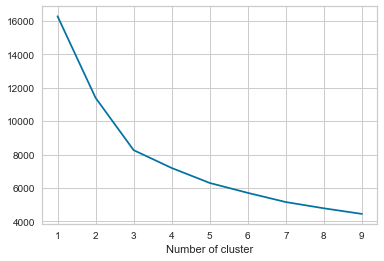

In [67]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.ticker as mticker
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,init='k-means++', random_state=0).fit(X_scaled_s1)
    df7_s1["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing
from yellowbrick.cluster import KElbowVisualizer


In [70]:
df7_s1.shape

(30640, 6)

In [71]:
'''%%time
model = KMeans(n_clusters=k, max_iter=1000,init='k-means++', random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X_scaled_s1)    
visualizer.poof()'''

"%%time\nmodel = KMeans(n_clusters=k, max_iter=1000,init='k-means++', random_state=0)\n# Instantiate the KElbowVisualizer with the number of clusters and the metric \nvisualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)\n# Fit the data and visualize\nvisualizer.fit(X_scaled_s1)    \nvisualizer.poof()"

In [72]:
np.random.seed(19680801)

For n_clusters = 4 The average silhouette_score is : 0.3920376822748003


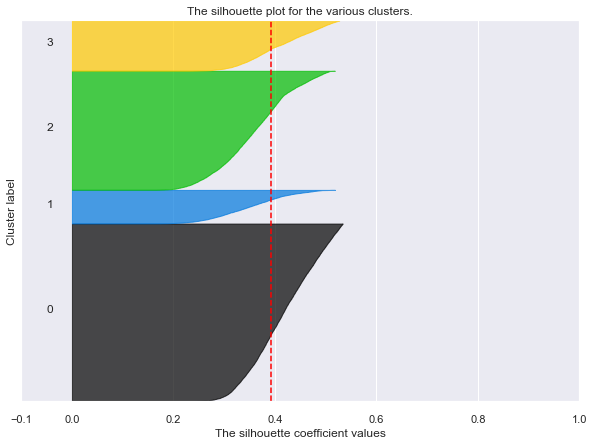

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [4]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.gcf()
    ax1 = fig.add_subplot()   
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled_s1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000,init='k-means++', random_state=0)
    cluster_labels = clusterer.fit_predict(X_scaled_s1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled_s1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled_s1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  
plt.show()


style.use("fivethirtyeight")
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.37721537693349516


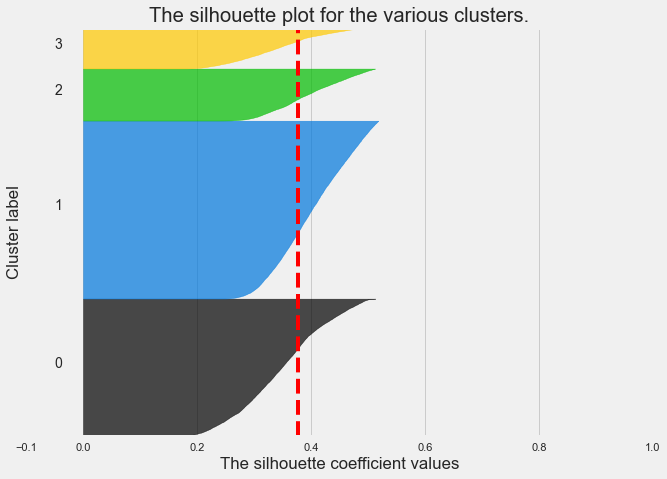

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [4]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.gcf()
    ax1 = fig.add_subplot()   
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled_s2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000,init='k-means++', random_state=0)
    cluster_labels_s2 = clusterer.fit_predict(X_scaled_s2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled_s2, cluster_labels_s2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled_s2, cluster_labels_s2)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_s2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
   
plt.show()


style.use("fivethirtyeight")
plt.show()

In [75]:
idx1 = pd.Index(df7_s1.index)
idx2 = pd.Index(df7_s2.index)
commun_customers_ids = idx1.intersection(idx2)

In [76]:
df7_s1_commun =df7_s1[df7_s1.index.isin(commun_customers_ids)]

In [77]:
df7_s2_commun =df7_s2[df7_s2.index.isin(commun_customers_ids)]

In [78]:
#df7_s1['clusters'] = cluster_labels

In [79]:
df7_s1_commun = df7_s1_commun.drop(columns=['clusters'])

In [80]:
X_s1 = df7_s1_commun.values
X_s2 = df7_s2_commun.values
X_scaled_s1_commun = preprocessing.quantile_transform(X_s1)

X_scaled_s2_commun = preprocessing.quantile_transform(X_s2)

C:\Users\ROUA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (243). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ROUA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (243). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [81]:
X_scaled_s2_commun.shape

(243, 5)

In [82]:
X_scaled_s1_commun.shape

(243, 5)

In [83]:
%%time
kmeans = KMeans(n_clusters=5, max_iter=1000,init='k-means++', random_state=0)
 
#predict the labels of clusters.
kmeans.fit(X_scaled_s1_commun)
df_trans_s1 = kmeans.predict(X_scaled_s1_commun)
df_trans_s2 = kmeans.predict(X_scaled_s2_commun)

Wall time: 104 ms


In [84]:
df_trans_s1

array([0, 1, 1, 0, 1, 0, 2, 1, 3, 3, 1, 3, 3, 2, 4, 0, 1, 2, 0, 0, 0, 1,
       3, 0, 2, 3, 4, 0, 1, 0, 0, 1, 0, 1, 3, 0, 4, 1, 3, 1, 1, 1, 3, 2,
       4, 3, 0, 1, 2, 2, 1, 1, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 1, 1, 2,
       3, 0, 3, 0, 1, 4, 4, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 3,
       2, 3, 1, 3, 0, 0, 0, 0, 1, 1, 1, 3, 0, 3, 1, 0, 3, 4, 1, 3, 1, 3,
       2, 4, 3, 0, 3, 0, 0, 0, 0, 1, 4, 3, 3, 3, 1, 0, 1, 3, 0, 0, 3, 1,
       0, 1, 0, 2, 1, 3, 0, 0, 4, 2, 1, 3, 0, 2, 3, 4, 1, 1, 0, 4, 0, 1,
       0, 4, 3, 1, 1, 2, 1, 3, 0, 0, 0, 0, 1, 2, 2, 4, 1, 1, 3, 0, 0, 4,
       0, 3, 3, 0, 2, 0, 0, 3, 3, 2, 2, 1, 1, 0, 1, 0, 3, 1, 0, 0, 0, 3,
       4, 0, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 3, 3, 4, 0, 3, 1, 3, 3, 3, 1,
       0, 4, 3, 3, 4, 0, 3, 3, 1, 3, 0, 3, 4, 1, 1, 0, 0, 3, 1, 1, 0, 0,
       1])

In [85]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df_trans_s1,df_trans_s2)

0.12779073027378976

In [86]:
df7_s1.shape

(30640, 6)

In [87]:
cluster_labels.shape

(30640,)

In [88]:
df7_s1['clusters'] = cluster_labels

In [89]:
from sklearn.metrics import davies_bouldin_score 
score_db = davies_bouldin_score(X_scaled_s1,cluster_labels)
score_db

1.1359763136769412

In [90]:
df7_s1.clusters.value_counts()

0    14287
2     9596
3     4053
1     2704
Name: clusters, dtype: int64

## **Visualisation des clusters**

In [91]:
# using pca for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled_s1)
df7_s1['pca-one'] = pca_result[:,0]
df7_s1['pca-two'] = pca_result[:,1] 
df7_s1['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31418474 0.25960675 0.15571138]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

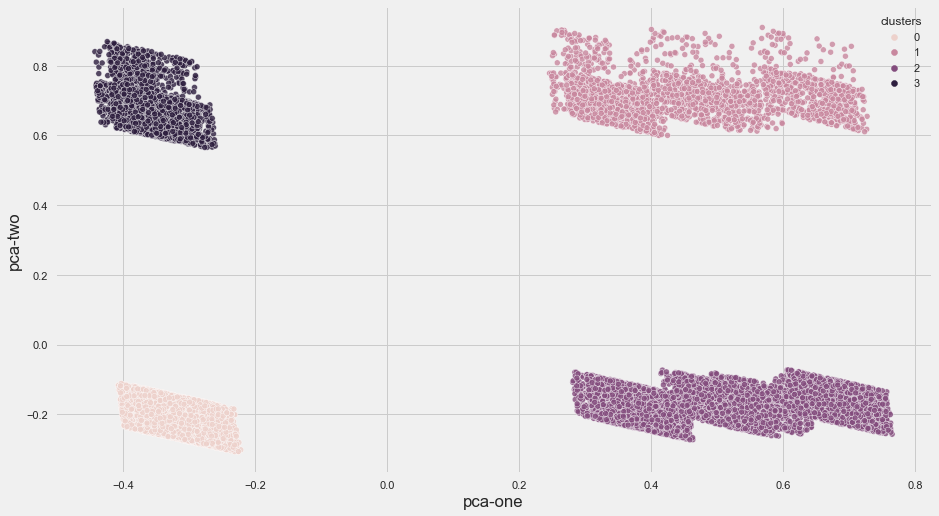

In [92]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="clusters",
    data=df7_s1,
    legend="full",
    alpha=0.8
)

In [93]:
#trying vizualization with tsne

In [94]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500,random_state=0)
tsne_results = tsne.fit_transform(X_scaled_s1)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30640 samples in 0.394s...
[t-SNE] Computed neighbors for 30640 samples in 5.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30640
[t-SNE] Computed conditional probabilities for sample 2000 / 30640
[t-SNE] Computed conditional probabilities for sample 3000 / 30640
[t-SNE] Computed conditional probabilities for sample 4000 / 30640
[t-SNE] Computed conditional probabilities for sample 5000 / 30640
[t-SNE] Computed conditional probabilities for sample 6000 / 30640
[t-SNE] Computed conditional probabilities for sample 7000 / 30640
[t-SNE] Computed conditional probabilities for sample 8000 / 30640
[t-SNE] Computed conditional probabilities for sample 9000 / 30640
[t-SNE] Computed conditional probabilities for sample 10000 / 30640
[t-SNE] Computed conditional probabilities for sample 11000 / 30640
[t-SNE] Computed conditional probabilities for sample 12000 / 30640
[t-SNE] Computed conditional probabilities for sa

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

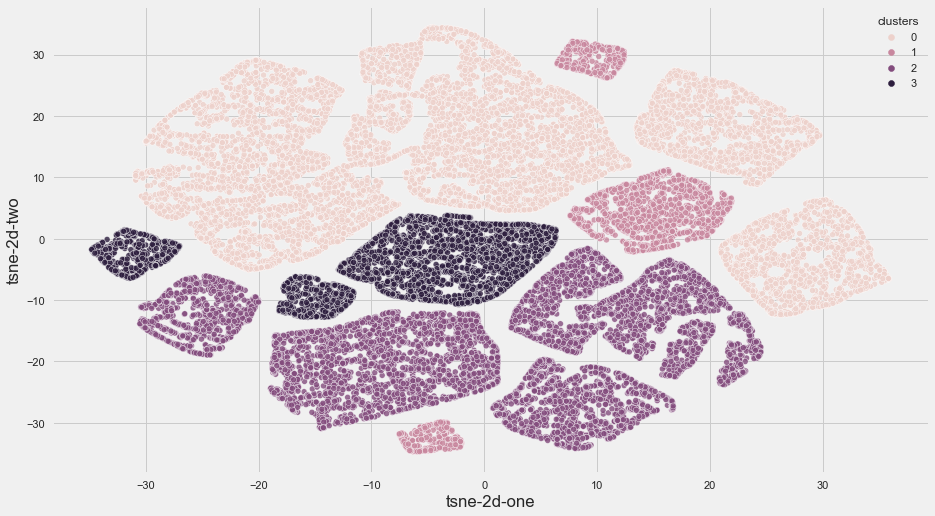

In [95]:
df7_s1['tsne-2d-one'] = tsne_results[:,0]
df7_s1['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="clusters",
    data=df7_s1,
    legend="full",
    alpha=0.8
)

In [96]:
df7_s1.columns

Index(['recency', 'sum of expenses', 'customer_state', 'review_score',
       'payment_type', 'clusters', 'pca-one', 'pca-two', 'pca-three',
       'tsne-2d-one', 'tsne-2d-two'],
      dtype='object')

## **Interprétation des clusters avec Radar graph**

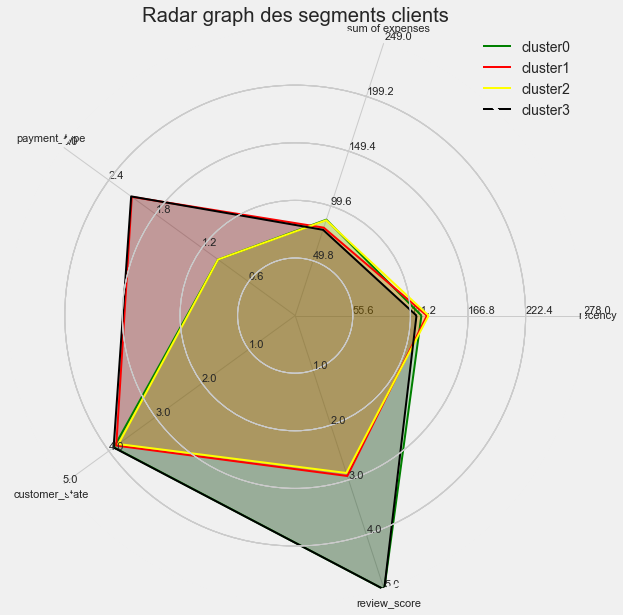

In [97]:
cluster0 = df7_s1[df7_s1["clusters"]==0]
cluster1 = df7_s1[df7_s1["clusters"]==1]
cluster2 = df7_s1[df7_s1["clusters"]==2]
cluster3 = df7_s1[df7_s1["clusters"]==3]

def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]


class RadarChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.1f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)


attributes = ['recency', 'sum of expenses','payment_type','customer_state','review_score']



cluster0_mean = cluster0[attributes].mean().values.reshape(1,-1)
cluster1_mean = cluster1[attributes].mean().values.reshape(1,-1)
cluster2_mean = cluster2[attributes].mean().values.reshape(1,-1)
cluster3_mean = cluster3[attributes].mean().values.reshape(1,-1)
#cluster4_mean = cluster3[attributes].mean().values.reshape(1,-1)

datas = np.concatenate((cluster0_mean,cluster1_mean,cluster2_mean,cluster3_mean),axis = 0)

ranges = [[1e-2, df7_s1[attr].max()] for attr in attributes]
colors = ["green","red","yellow","black"]
left_types = ["cluster0","cluster1","cluster2","cluster3"]


fig = plt.figure(figsize=(10, 10))
radar = RadarChart(fig, attributes, ranges)

for data, color, left_type in zip(datas, colors, left_types):
    radar.plot(data, color = color, label = left_type, linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = color)
    radar.legend(loc = 1, fontsize = 'medium')

plt.title('Radar graph des segments clients')
plt.show()

 Interprétation:
 jaune: clients insatisfaits avec payment par carte<br>
 vert: clients insatisfaits qui payent par billets <br>
 rouge: clients super satisfaits <br>
 noir: clients super satisfaits qui payent par billets <br>

Reprendre la même procédure en ajoutant la catégorie des produits aux variables sélectionnées

## **5. Kmeans (combinaison de variables 2)**

In [98]:
# added product_category to selected variables

In [99]:
df7_s1 = pd.merge(df6_s1, data_process_s1, on='customer_unique_id')
df7_s2 = pd.merge(df6_s2, data_process_s2, on='customer_unique_id')
conditions = [
    (df7_s1['product_category_name_sports_leisure'] == 1),
    (df7_s1['product_category_name_electronics'] == 1),
    (df7_s1['product_category_name_home'] == 1),
    (df7_s1['product_category_name_health_beauty'] == 1),
    (df7_s1['product_category_name_fashion'] == 1),

    ]
choices = [5,4,3,2,1]
#df7_s1['product_category_name'] = np.select(conditions, choices)

conditions = [
    (df7_s2['product_category_name_sports_leisure'] == 1),
    (df7_s2['product_category_name_electronics'] == 1),
    (df7_s2['product_category_name_home'] == 1),
    (df7_s2['product_category_name_health_beauty'] == 1),
    (df7_s2['product_category_name_fashion'] == 1),

    ]

selected_variables=['recency', 'sum of expenses','review_score','product_category_name_sports_leisure','product_category_name_health_beauty',
                   'product_category_name_electronics','product_category_name_furniture','product_category_name_home']
df7_s1=df7_s1[selected_variables]

In [100]:
#df7_s2['product_category_name'] = np.select(conditions, choices)
df7_s2=df7_s2[selected_variables]
df7_s1 = df7_s1.drop(df7_s1[df7_s1['sum of expenses'] ==0].index)
df7_s2 = df7_s2.drop(df7_s2[df7_s2['sum of expenses'] ==0].index)

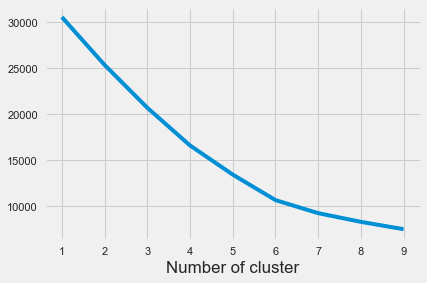

In [101]:
from scipy import stats
df7_s1=df7_s1[(np.abs(stats.zscore(df7_s1)) < 3).all(axis=1)]
df7_s2=df7_s2[(np.abs(stats.zscore(df7_s2)) < 3).all(axis=1)]

# transformer les données en array numpy only numeric data
X_s1 = df7_s1.values
X_s2 = df7_s2.values


X_scaled_s1 = preprocessing.quantile_transform(X_s1)

X_scaled_s2 = preprocessing.quantile_transform(X_s2)

import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.ticker as mticker
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,init='k-means++', random_state=0).fit(X_scaled_s1)
    df7_s1["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

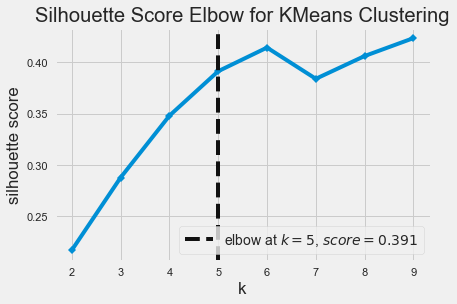

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [114]:
model = KMeans(n_clusters=k, max_iter=1000,init='k-means++', random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X_scaled_s1)    
visualizer.poof()

For n_clusters = 9 The average silhouette_score is : 0.42344440092477337


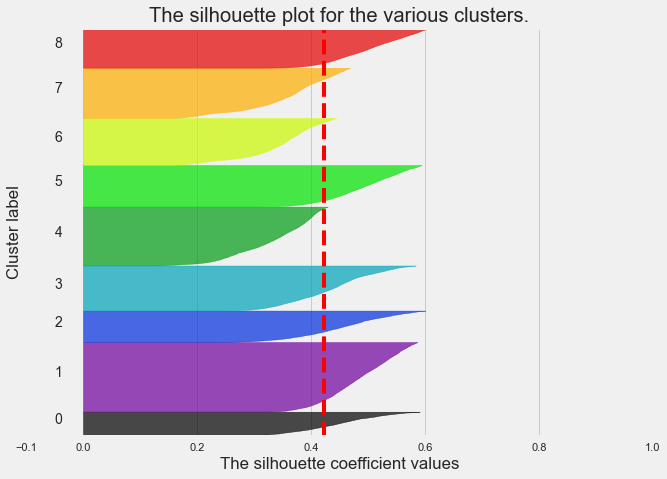

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [9]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.gcf()
    ax1 = fig.add_subplot()   
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled_s1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000,init='k-means++', random_state=0)
    cluster_labels = clusterer.fit_predict(X_scaled_s1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled_s1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled_s1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  
plt.show()
style.use("fivethirtyeight")
plt.show()

In [117]:
score_db = davies_bouldin_score(X_scaled_s1,cluster_labels)
score_db

0.9191311144910631

In [118]:
idx1 = pd.Index(df7_s1.index)
idx2 = pd.Index(df7_s2.index)
commun_customers_ids = idx1.intersection(idx2)
df7_s1_commun =df7_s1[df7_s1.index.isin(commun_customers_ids)]
df7_s2_commun =df7_s2[df7_s2.index.isin(commun_customers_ids)]
df7_s1_commun = df7_s1_commun.drop(columns=['clusters'])

X_s1 = df7_s1_commun.values
X_s2 = df7_s2_commun.values

X_scaled_s1_commun = preprocessing.quantile_transform(X_s1)

X_scaled_s2_commun = preprocessing.quantile_transform(X_s2)

In [119]:
%%time
#Initialize the class object

kmeans = KMeans(n_clusters=9, max_iter=1000,init='k-means++', random_state=0)
 
#predict the labels of clusters.
kmeans.fit(X_scaled_s1_commun)
df_trans_s1 = kmeans.predict(X_scaled_s1_commun)
df_trans_s2 = kmeans.predict(X_scaled_s2_commun)

adjusted_rand_score(df_trans_s1,df_trans_s2)

Wall time: 669 ms


0.005825633549208866

In [107]:
cluster_labels.shape

(32302,)

In [124]:
df7_s1['clusters'] = cluster_labels

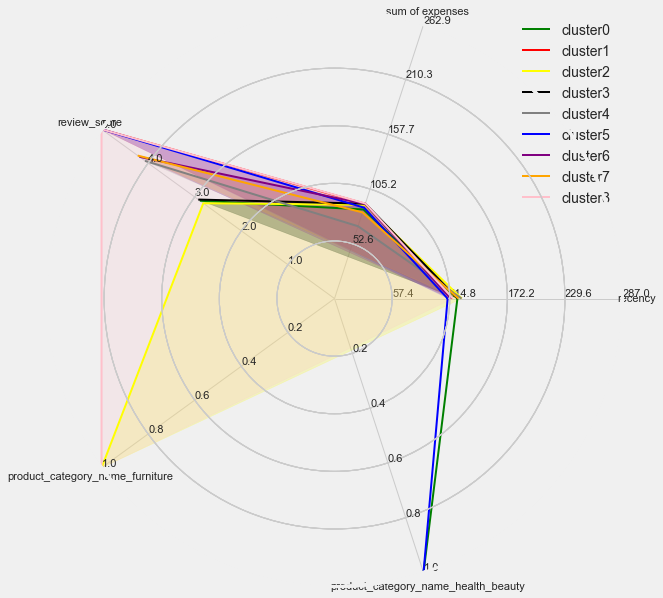

In [125]:
cluster0 = df7_s1[df7_s1["clusters"]==0]
cluster1 = df7_s1[df7_s1["clusters"]==1]
cluster2 = df7_s1[df7_s1["clusters"]==2]
cluster3 = df7_s1[df7_s1["clusters"]==3]
cluster4 = df7_s1[df7_s1["clusters"]==4]
cluster5 = df7_s1[df7_s1["clusters"]==5]
cluster6 = df7_s1[df7_s1["clusters"]==6]
cluster7 = df7_s1[df7_s1["clusters"]==7]
cluster8 = df7_s1[df7_s1["clusters"]==8]


def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]


class RadarChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.1f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)


attributes = ['recency', 'sum of expenses','review_score','product_category_name_furniture',
              'product_category_name_health_beauty']



cluster0_mean = cluster0[attributes].mean().values.reshape(1,-1)
cluster1_mean = cluster1[attributes].mean().values.reshape(1,-1)
cluster2_mean = cluster2[attributes].mean().values.reshape(1,-1)
cluster3_mean = cluster3[attributes].mean().values.reshape(1,-1)
cluster4_mean = cluster4[attributes].mean().values.reshape(1,-1)
cluster5_mean = cluster5[attributes].mean().values.reshape(1,-1)
cluster6_mean = cluster6[attributes].mean().values.reshape(1,-1)
cluster7_mean = cluster7[attributes].mean().values.reshape(1,-1)
cluster8_mean = cluster8[attributes].mean().values.reshape(1,-1)

datas = np.concatenate((cluster0_mean,cluster1_mean,cluster2_mean,cluster3_mean,cluster4_mean,cluster5_mean,cluster6_mean,cluster7_mean,cluster8_mean),axis = 0)

ranges = [[1e-2, df7_s1[attr].max()] for attr in attributes]
colors = ["green","red","yellow","black","grey","blue","purple","orange","pink"]
left_types = ["cluster0","cluster1","cluster2","cluster3","cluster4","cluster5","cluster6","cluster7","cluster8"]

'''colors = ["green","red"]
left_types = ["cluster0","cluster1"]'''

fig = plt.figure(figsize=(10, 10))
radar = RadarChart(fig, attributes, ranges)

for data, color, left_type in zip(datas, colors, left_types):
    radar.plot(data, color = color, label = left_type, linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = color)
    radar.legend(loc = 1, fontsize = 'medium')

plt.title('')
plt.show()

## **Interprétation**
Noir: clients satisfaits, ayant acheté des fournitures <br>
Jaune: clients super satisfaits <br>
Vert: clients ayant acheté des produits de beauté <br>
Rouge: clients insatisfaits <br>
Gris: clients qui ont faiblement dépensé <br>
 Bleu: clients réguliers relativement satisfaits <br>

## **6.Conclusion**

J’ai choisi le 2ème Kmeans avec les varibles d’entrées : Rcency, sum of expenses, review_score, product category (4)
Les classes les plus équilibrés.
Facilement interprétables.
Il faut demander l’avis de l’équipe marketing
Les modèles donnent des scores silhouettes proches.
On a choisit k means vu c’est le moins gourmand en durée d’exécution et plus flexible sur les données de grande taille.
Le nettoyage des données a une grande effet sur les clusters (kmeans est sensible aux outliers).
On choisit le clustering qui nous donnent la meilleure interprétabilité.
On peut choisir d’autres algorithmes qui sont des versions améliorées du kmeans ou combinaison entre kmeans et CAH (les 2 sont populaires pour la segmentation des clients).

In [490]:
final_date = df6["order_delivered_customer_date"].max()
final_date_minus_one_year = df6["order_delivered_customer_date"].max() - pd.DateOffset(years=1)

print("Final date:\t\t\t", final_date)
print("Final date minus one year:\t", final_date_minus_one_year)

Final date:			 2018-10-17 13:22:46
Final date minus one year:	 2017-10-17 13:22:46


In [491]:
for i in range(0, 12, 2):
    
    final_date_temp = final_date - pd.DateOffset(months=i)
    final_date_minus_one_year_temp = final_date_minus_one_year - pd.DateOffset(months=i)

    print("dataset_" + str(i) + "_months")
    print("from " + str(final_date_minus_one_year_temp) + " to " + str(final_date_temp) +"\n")

dataset_0_months
from 2017-10-17 13:22:46 to 2018-10-17 13:22:46

dataset_2_months
from 2017-08-17 13:22:46 to 2018-08-17 13:22:46

dataset_4_months
from 2017-06-17 13:22:46 to 2018-06-17 13:22:46

dataset_6_months
from 2017-04-17 13:22:46 to 2018-04-17 13:22:46

dataset_8_months
from 2017-02-17 13:22:46 to 2018-02-17 13:22:46

dataset_10_months
from 2016-12-17 13:22:46 to 2017-12-17 13:22:46



In [492]:
for i in range(0, 12, 2):
    
    final_date_temp = final_date - pd.DateOffset(months=i)
    final_date_minus_one_year_temp = final_date_minus_one_year - pd.DateOffset(months=i)
    dict={}
    dict["df6_last_year_minus_" + str(i) + "_months"] = \
                df6.loc[(df6["order_delivered_customer_date"] >= final_date_minus_one_year_temp) & \
                               (df6["order_delivered_customer_date"] <= final_date_temp)].copy()

In [493]:
df6_last_year_minus_0_months

,Unnamed: 0,order_id,customer_unique_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state_north,customer_state_north east,customer_state_south,customer_state_south east,seller_state_center east,seller_state_north,seller_state_north east,seller_state_south,seller_state_south east,recency
3,8,bfc39df4f36c3693ff3b63fcbea9e90a,e781fdcc107d13d865fc7698711cc572,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,0,0,1,0,0,0,0,0,1,2017-11-07 18:04:59
22,30,fed5e295c5412218d84f60a3d09717f4,30e6832584525af7548c39b006897e34,2017-10-13 10:59:41,2017-10-13 11:14:23,2017-10-16 18:05:17,2017-10-19 19:33:21,2017-10-25 00:00:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,0,0,0,1,0,0,0,0,1,2017-10-19 19:33:21
33,45,60d13096e69ace88a0c5b8c3805010ca,581c85ba0bfacbdb3f21e5ac6fd2187a,2017-11-06 13:48:10,2017-11-07 07:30:35,2017-11-10 14:24:33,2017-11-18 12:21:41,2017-11-28 00:00:00,1,605050407239c811cf987c99fbabaf4d,...,0,0,0,1,0,0,0,0,1,2017-11-18 12:21:41
36,49,f8b3a190c48ca5261da8494b51c540bd,b2ed6ed08d758a308f53dad5d0340548,2017-11-05 15:56:14,2017-11-05 16:10:28,2017-11-06 19:33:24,2017-11-14 22:59:46,2017-11-28 00:00:00,1,c6d0daec0037d0ac4ee036ddff197b35,...,0,0,0,1,0,0,0,0,1,2017-11-14 22:59:46
37,50,bea597ea1f5ff4fa02bcaf403531e944,9a6d3775ed3c4dc33243faf14264f1a9,2017-10-20 22:34:48,2017-10-20 22:49:17,2017-10-23 19:48:21,2017-10-24 22:43:56,2017-11-01 00:00:00,1,c6d0daec0037d0ac4ee036ddff197b35,...,0,0,0,1,0,0,0,0,1,2017-10-24 22:43:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96472,127586,5bacbd9f42bd029c3a296501224e193e,0b39f417a3c099ff0497346258e8d752,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,1,710e8b076db06c8e5343a9e23f0e3d83,...,0,0,0,1,0,0,0,1,0,2018-08-21 04:16:31
96473,127590,1ab38815794efa43d269d62b98dae815,2077f7ec37df79c62cc24b7b8f30e8c9,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1,31ec3a565e06de4bdf9d2a511b822b4d,...,0,0,0,1,0,0,0,0,1,2018-07-09 15:06:57
96474,127592,735dce2d574afe8eb87e80a3d6229c48,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1,1d187e8e7a30417fda31e85679d96f0f,...,0,1,0,0,0,0,0,0,1,2018-08-02 22:47:35
96475,127593,25d2bfa43663a23586afd12f15b542e7,e55e436481078787e32349cee9febf5e,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1,6e1c2008dea1929b9b6c27fa01381e90,...,0,0,0,1,0,0,0,0,1,2018-06-12 23:11:29


In [494]:

for i in range(0, 12, 2):
    globals()["df6_rfm_last_year_minus_" + str(i) + "_months"] = globals()["df6_last_year_minus_" + str(i) + "_months"].\
                                                                    groupby(["customer_unique_id"]).\
                                                                    agg({
                                                                       'recency': lambda x: (final_date -x).dt.days,
                                                                       'order_id': 'count',
                                                                       'price': 'sum'})


In [505]:
for i in range(0, 12, 2):
    globals()["data_" + str(i) + "_months"] = globals()["df6_rfm_last_year_minus_" + str(i) + "_months"]\
                                                .merge(globals()["df6_last_year_minus_" + str(i) + "_months"],
                                                      on="customer_unique_id", how="left")                                                                    
       

In [506]:
for i in range(0, 12, 2):
    globals()["data_" + str(i) + "_months"] = globals()["data_" + str(i) + "_months"]\
                                                [['customer_unique_id','recency_x','order_id_x','price_x','review_score','product_category_name_furniture',
                                                  'product_category_name_health_beauty']]                                                        
 

In [507]:
data_2_months

,customer_unique_id,recency_x,order_id_x,price_x,review_score,product_category_name_furniture,product_category_name_health_beauty
0,0000366f3b9a7992bf8c76cfdf3221e2,153,1,129.90,5.0,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,159,1,18.90,4.0,0,1
2,0000f6ccb0745a6a4b88665a16c9f078,349,1,25.99,4.0,0,0
3,0004aac84e0df4da2b147fca70cf8255,323,1,180.00,5.0,0,0
4,0004bd2a26a76fe21f786e4fbd80607f,192,1,154.00,4.0,0,0
...,...,...,...,...,...,...,...
73664,fffa431dd3fcdefea4b1777d114144f2,340,1,64.99,5.0,0,0
73665,fffb09418989a0dbff854a28163e47c6,294,1,58.00,5.0,0,0
73666,fffbf87b7a1a6fa8b03f081c5f51a201,274,1,149.00,5.0,0,0
73667,fffea47cd6d3cc0a88bd621562a9d061,280,1,64.89,4.0,0,1


In [508]:
cols = data_2_months.columns

In [509]:
for i in range(0, 12, 2):
    globals()["data_" + str(i) + "_months"].columns=pd.to_numeric(globals()["data_" + str(i) + "_months"].columns, errors ='coerce').fillna(0).astype('int')

#np.argwhere(np.isnan(globals()["data_" + str(i) + "_months"][["recency_x", "price_x"]].values))


In [514]:
cols.values

array(['customer_unique_id', 'recency_x', 'order_id_x', 'price_x',
       'review_score', 'product_category_name_furniture',
       'product_category_name_health_beauty'], dtype=object)

In [516]:
for i in range(0, 12, 2):
    globals()["data_" + str(i) + "_months"].columns = cols

In [517]:
data_2_months

,customer_unique_id,recency_x,order_id_x,price_x,review_score,product_category_name_furniture,product_category_name_health_beauty
0,0000366f3b9a7992bf8c76cfdf3221e2,153,1,129.90,5.0,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,159,1,18.90,4.0,0,1
2,0000f6ccb0745a6a4b88665a16c9f078,349,1,25.99,4.0,0,0
3,0004aac84e0df4da2b147fca70cf8255,323,1,180.00,5.0,0,0
4,0004bd2a26a76fe21f786e4fbd80607f,192,1,154.00,4.0,0,0
...,...,...,...,...,...,...,...
73664,fffa431dd3fcdefea4b1777d114144f2,340,1,64.99,5.0,0,0
73665,fffb09418989a0dbff854a28163e47c6,294,1,58.00,5.0,0,0
73666,fffbf87b7a1a6fa8b03f081c5f51a201,274,1,149.00,5.0,0,0
73667,fffea47cd6d3cc0a88bd621562a9d061,280,1,64.89,4.0,0,1


In [518]:
for i in range(0, 12, 2):
    globals()["df_data_" + str(i) + "_months"] = globals()["data_" + str(i) + "_months"][["recency_x", "price_x"]].copy()


In [519]:
for i in range(0,12,2):
    
    globals()["df_data_" + str(i) + "_months"].recency_x =pd.to_numeric(globals()["df_data_" + str(i) + "_months"].recency_x, errors ='coerce').fillna(0).astype('int')
    globals()["df_data_" + str(i) + "_months"].price_x =pd.to_numeric(globals()["df_data_" + str(i) + "_months"].price_x, errors ='coerce').fillna(0).astype('int')

In [520]:
#df_data_2_months = preprocessing.quantile_transform(df_data_2_months.values)
for i in range (0,12,2):
    globals()["df_data_" + str(i) + "_months"] = preprocessing.quantile_transform(globals()["df_data_" + str(i) + "_months"])

In [521]:
for i in range (0,12,2):
    globals()["data_" + str(i) + "_months"]['recency_x'] = globals()["df_data_" + str(i) + "_months"][:,0]
    globals()["data_" + str(i) + "_months"]['price_x'] = globals()["df_data_" + str(i) + "_months"][:,1]


In [522]:
data_2_months

,customer_unique_id,recency_x,order_id_x,price_x,review_score,product_category_name_furniture,product_category_name_health_beauty
0,0000366f3b9a7992bf8c76cfdf3221e2,0.310811,1,0.796296,5.0,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.331832,1,0.140641,4.0,0,1
2,0000f6ccb0745a6a4b88665a16c9f078,0.862362,1,0.198198,4.0,0,0
3,0004aac84e0df4da2b147fca70cf8255,0.816316,1,0.923423,5.0,0,0
4,0004bd2a26a76fe21f786e4fbd80607f,0.442442,1,0.870370,4.0,0,0
...,...,...,...,...,...,...,...
73664,fffa431dd3fcdefea4b1777d114144f2,0.847347,1,0.496997,5.0,0,0
73665,fffb09418989a0dbff854a28163e47c6,0.727227,1,0.453453,5.0,0,0
73666,fffbf87b7a1a6fa8b03f081c5f51a201,0.677678,1,0.854354,5.0,0,0
73667,fffea47cd6d3cc0a88bd621562a9d061,0.692192,1,0.496997,4.0,0,1


In [523]:
# Kmeans pour touts les datasets
clusterer = KMeans(n_clusters=6, max_iter=1000,init='k-means++', random_state=0)
for i in range(0, 12, 2):
    
    globals()["cluster_labels_" + str(i) + "_months"] = clusterer.fit_predict(globals()["data_" + str(i) + "_months"][['recency_x','order_id_x','price_x','review_score','product_category_name_furniture','product_category_name_health_beauty']])

In [524]:
cluster_labels_2_months

array([5, 4, 3, ..., 1, 4, 1])

In [525]:
data_2_months['label']=cluster_labels_2_months

In [526]:
for i in range(0,12,2):
    globals()["data_" + str(i) + "_months"]['cluster_label']=globals()["cluster_labels_" + str(i) + "_months"]

In [531]:
data_0_months

,customer_unique_id,recency_x,order_id_x,price_x,review_score,product_category_name_furniture,product_category_name_health_beauty,cluster_label_pred
0,0000366f3b9a7992bf8c76cfdf3221e2,0.376376,1,0.796797,5.0,1,0,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.399399,1,0.140641,4.0,0,1,0
2,0000f6ccb0745a6a4b88665a16c9f078,0.962462,1,0.198699,4.0,0,0,0
3,0004aac84e0df4da2b147fca70cf8255,0.913413,1,0.924424,5.0,0,0,2
4,0004bd2a26a76fe21f786e4fbd80607f,0.516517,1,0.872873,4.0,0,0,0
...,...,...,...,...,...,...,...,...
69537,fffa431dd3fcdefea4b1777d114144f2,0.946446,1,0.495495,5.0,0,0,2
69538,fffb09418989a0dbff854a28163e47c6,0.818318,1,0.454955,5.0,0,0,2
69539,fffbf87b7a1a6fa8b03f081c5f51a201,0.766266,1,0.856356,5.0,0,0,2
69540,fffea47cd6d3cc0a88bd621562a9d061,0.781782,1,0.495495,4.0,0,1,0


In [530]:
data_0_months = data_0_months.rename(columns={'cluster_label':'cluster_label_pred'})

In [532]:
print("Customers in commun")
print("-"*20 + "\n")

for i in range(10, 0, -2):
    
    globals()["df_0_vs_" + str(i)] = pd.merge(data_0_months, 
                                              globals()["data_" + str(i) + "_months"],
                                              how="inner",
                                              on=["customer_unique_id"])
    
    
    globals()["df_0_vs_" + str(i)].rename(columns={
        "cluster_label" : "cluster_label_true"        
    }, inplace=True)
    
    print("df_0_vs_" + str(i))
    print(globals()["df_0_vs_" + str(i)].shape, "\n")

Customers in commun
--------------------

df_0_vs_10
(12554, 15) 

df_0_vs_8
(26257, 15) 

df_0_vs_6
(41022, 15) 

df_0_vs_4
(55850, 15) 

df_0_vs_2
(69621, 16) 



In [533]:
df_0_vs_6

,customer_unique_id,recency_x_x,order_id_x_x,price_x_x,review_score_x,product_category_name_furniture_x,product_category_name_health_beauty_x,cluster_label_pred,recency_x_y,order_id_x_y,price_x_y,review_score_y,product_category_name_furniture_y,product_category_name_health_beauty_y,cluster_label_true
0,0000f6ccb0745a6a4b88665a16c9f078,0.962462,1,0.198699,4.0,0,0,0,0.623624,1,0.201201,4.0,0,0,2
1,0004aac84e0df4da2b147fca70cf8255,0.913413,1,0.924424,5.0,0,0,2,0.565566,1,0.921421,5.0,0,0,0
2,0004bd2a26a76fe21f786e4fbd80607f,0.516517,1,0.872873,4.0,0,0,0,0.101101,1,0.869369,4.0,0,0,2
3,00053a61a98854899e70ed204dd4bafe,0.589089,1,0.938438,1.0,0,0,1,0.186186,1,0.934434,1.0,0,0,1
4,00082cbe03e478190aadbea78542e933,0.905906,1,0.580581,5.0,0,0,2,0.557558,1,0.583083,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41017,fff7219c86179ca6441b8f37823ba3d3,0.752252,1,0.775776,4.0,1,0,3,0.377878,1,0.778278,4.0,1,0,4
41018,fffa431dd3fcdefea4b1777d114144f2,0.946446,1,0.495495,5.0,0,0,2,0.604605,1,0.503504,5.0,0,0,0
41019,fffb09418989a0dbff854a28163e47c6,0.818318,1,0.454955,5.0,0,0,2,0.455455,1,0.453954,5.0,0,0,0
41020,fffbf87b7a1a6fa8b03f081c5f51a201,0.766266,1,0.856356,5.0,0,0,2,0.393894,1,0.854855,5.0,0,0,0


In [534]:
RESUL_ARI = []
for i in range(10, 0, -2):
    
    print("Last year vs shifted " + str(i) + " months before")
    result = adjusted_rand_score(globals()["df_0_vs_" + str(i)]["cluster_label_true"],
                             globals()["df_0_vs_" + str(i)]["cluster_label_pred"])
    
    RESUL_ARI.append(result)
    print(result)
    print("-"*40)

Last year vs shifted 10 months before
0.6825411830147067
----------------------------------------
Last year vs shifted 8 months before
0.8742695103269231
----------------------------------------
Last year vs shifted 6 months before
0.716318487357575
----------------------------------------
Last year vs shifted 4 months before
0.9004902076370992
----------------------------------------
Last year vs shifted 2 months before
0.9080069894886992
----------------------------------------


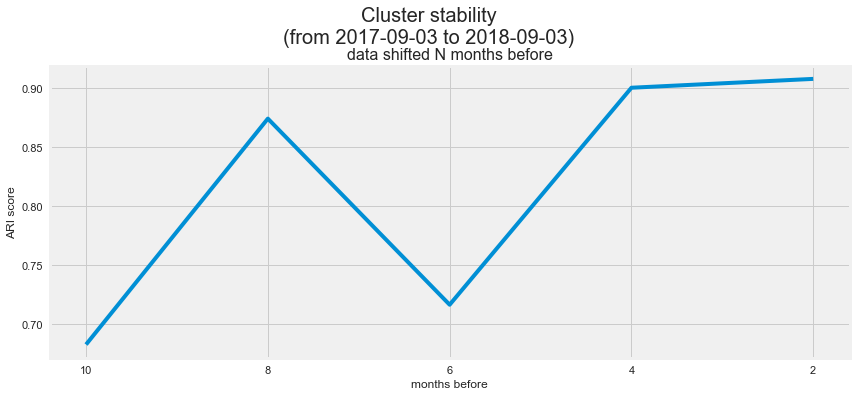

In [536]:
fig = plt.subplots(figsize=(12, 6))
sns.lineplot(y=RESUL_ARI, x=["10", "8", "6", "4", "2"])
plt.xlabel("months before", size=12)
plt.ylabel("ARI score", size=12)
plt.suptitle("Cluster stability\n(from 2017-09-03 to 2018-09-03)", size=20, y=0.91)
plt.title("\ndata shifted N months before", size=16)
plt.tight_layout()
plt.show()